In [1]:
import pandas as pd
import numpy as np

import sys, os
sys.path.append(os.path.abspath("../src"))

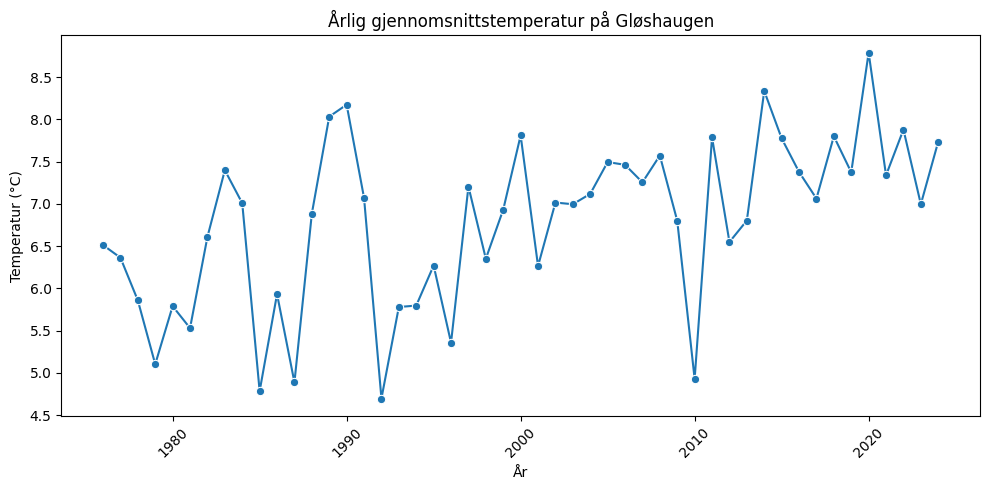

c:\Users\idunn\OneDrive - NTNU\TDT4114\Mappe\src\temp_visualisering.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=decade_df, x="tiår", y="gjennomsnitt", palette="Blues_d")


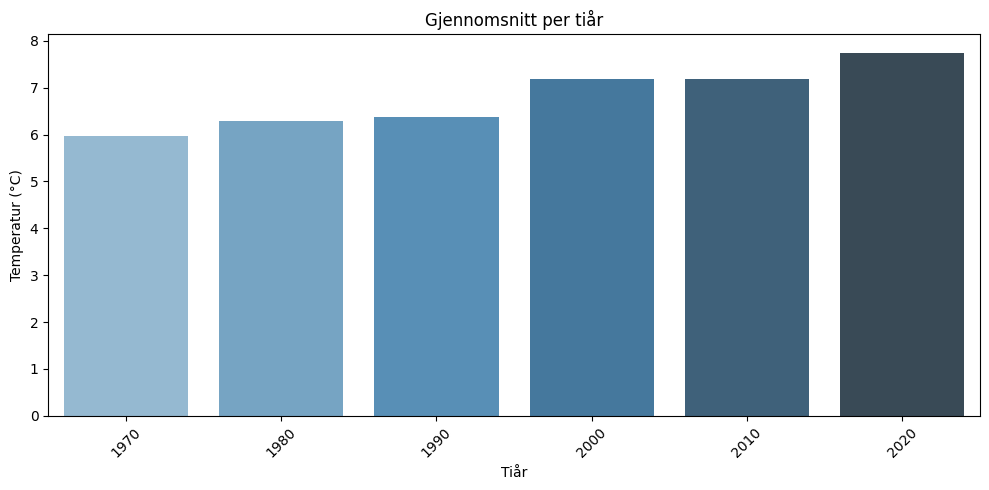

In [2]:
from temp_visualisering import load_and_compute, plot_annual, plot_by_decade

# 1) Last inn og beregn én gang
årlig_snitt, tiårs_snitt = load_and_compute("../data/temp_gloshaugen_historisk_renset_ 50.csv")

# 2) Kall den ene funksjonen du vil vise:
plot_annual(årlig_snitt)
plot_by_decade(tiårs_snitt)